# Insurance Company Premium Default Prediction:
![Insurance Premium](https://www.charitytaxgroup.org.uk/wp-content/uploads/insurance-premium.jpg)

This is a case of predictive modeling. I'll use basic ML algorithms but I have researched a bit for this dataset so I'll be going as detailed & informative as possible. Please forgive me if it feels lengthy :P

## The model building is a step-by-step process with following 3 major steps:
1. Algorithm Selection
2. Training Model
3. Predicting

Starting with the first step which is the Algorithm Selection:

## 1. Algorithm Selection:

The most important task to begin with this step is to identify whether the given dataset has dependent(target) variables or not. So I'll be uploading the train & test datasets below. Now to read those datasets, python requires a library called **Pandas**. So I'll first upload that library:

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/insurance-company-dataset/train.csv
/kaggle/input/insurance-company-dataset/test.csv


In [2]:
# Now loading the train & test datasets individually:
train=pd.read_csv("../input/insurance-company-dataset/train.csv")
test=pd.read_csv("../input/insurance-company-dataset/test.csv")

In [3]:
# Checking the dimensions of both the datasets side-by-side:
train.shape, test.shape

((79853, 13), (34224, 11))

This means there are 13 columns in train dataset, whereas 11 in the test dataset. One of the missing columns in the test dataset is the "target" variable and I'll train my model to predict that variable. Also, since the target variable is present in the train dataset so the predictive model that is going to be built below can also be called a **Supervised Learning model**.

## Data Exploration:

Analysing the dataset is a part of a big process called Data Exploration. The various stages of this process are:

1. Reading the data
2. Variable identification
3. Univariate analysis
4. Bivariate analysis
5. Missing value treatment
6. Outlier treatment
7. Variable transformation.

In [4]:
# Starting with reading the data. The first five rows of train dataset are:
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


The 'target' column is present on the extreme right of the dataset. This column is a dependent column(dependent variable) as its values are dependent on other columns(independent variables). Notice that its values are not continuous as it only contains either 1s or 0s. So this is a **Classification problem**. This means the following algorithms suit this problem:

1. Logistic Regression
2. Decision Tree
3. Random Forest

In [5]:
# And first five rows of the test dataset:
test.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural


The 'target' column is not present in the test dataset. It is this column which I have to predict using my model. Also, the 'Premium' column too is absent in the test dataset. So I'll try dropping it from the train data as well, and see what result I get without it:

In [6]:
train=train.drop('premium',axis=1)

In [7]:
# Now checking the datatype of all the columns/variables:
train.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

This shows there are 5 columns of int type, 5 columns of float type, & 2 columns of object type in the train dataset.

The categorical variables are stored as 'object'. Whereas continuous variables are stored as 'int' or 'float'. The int type can only take discrete/fixed integer values. Whereas float type can take any real values.

Now before starting the Univariate Analysis, I'd like to write the **details of all the columns** in the dataset:
1. **id**: Unique ID of the policy
2. **perc_premium_paid_by_cash_credit**: Percentage of premium amount paid by cash or credit card
3. **age_in_days**: Age in days of policy holder
4. **Income**: Monthly Income of policy holder
5. **Count_3-6_months_late**: No of premiums late by 3 to 6 months
6. **Count_6-12_months_late**: No of premiums late by 6 to 12 months
7. **Count_more_than_12_months_late**: No of premiums late by more than 12 months
8. **application_underwriting_score**: Underwriting Score of the applicant at the time of application (No applications under the score of 90 are insured)
9. **no_of_premiums_paid**: Total premiums paid on time till now
10. **sourcing_channel**: Sourcing channel for application
11. **residence_area_type**: Area type of Residence (Urban/Rural)
12. **target**: 1 - premium paid on time, 0 - otherwise

I'll check for the twelfth column, ie; did customers pay the insurance premium on time or not
![Premium paid](https://www.healthcare.gov/assets/health-insurance-monthly-premium.png)

## Univariate analysis:
Now I'll be exploring one variable at a time. The univariate analysis is different for continuous & categorical variables. In continuous variables I'll be looking for the following:

1. Statistical properties like central tendency & dispersion (mean,median & standard deviation)
2. Distribution of variable (symmetric/right skewed/left skewed)
3. Presence of missing values
4. Presence of outliers

The methods that I am going to use for the **univariate analysis of continuous variables** are:

1. Tabular methods- to represent mean, median, standard deviation & presence of missing values
2. Graphical methods- to represent the distribution of variables & presence of outliers.

In [8]:
# The Statistical properties of all the continuous variables can be checked by using 'describe' function as follows:
train.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


Below the standard deviation row there are 5 other rows that represent the data distribution in the dataset. It's starting with minimum value, the 3 Quartile points, and maximum value of the dataset. Quartiles are values that divide the data distribution into 4 parts. The 25% is representing the **25th percentile** of data. It is called the **1st Quartile**. While 75% is the **75th percentile** and is called **3rd Quartile**. The 50% is the **50th percentile** & it is called the **2nd Quartile**. This 50th percentile also represents the median value of the corresponding column of the dataset.

For example, the median value of 1st column 'id' is almost equal to its 'mean' value. This means the data of this column has a symmetric distribution. Same is true for the 3rd column 'age_in_days'. While for the 2nd column 'perc_premium_paid_by_cash' the mean is 0.314288 and median is 0.167000. This difference tells that the data distribution is not symmetric for this column. So I'll explore this column data and all other columns(like 'income', all 3 'count' columns, etc) that represent such unequal data symmetry via plots. Plus, the statistics shown above can be visualized by the help of boxplots. A **boxplot** shows the minimum value, 1st Quartile, median value, 3rd Quartile & the maximum value of a variable. Beyond the minimum and maximum values on the boxplot, we have outliers. These outliers are unusually small or large values in the dataset. These can arise due to the following errors:

1. Data entry errors
2. Measurement errors
3. Processing errors
4. Change in the underlying population.

I'll first plot the boxplots for various variables, then explore the distribution plots.

In [9]:
# Now before plotting the boxplot, I require a library called matplotlib. So I'm importing it:
import matplotlib.pyplot as plt
%matplotlib inline
# Also importing 'seaborn' library to better visualize the distributions:
import seaborn as sn
# This library uses matplotlib underneath to plot graphs but has better graphics than matplotlib.

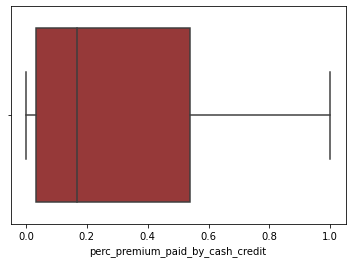

In [10]:
# Plotting boxplot for 'perc_premium_paid_by_cash_credit' column using the 'seaborn' library:
sn.boxplot(train['perc_premium_paid_by_cash_credit'],color='brown')
plt.show()

Starting from the left(0.0):

1. The first vertical line is called Lower Fence. It is the minimum value of 'perc_premium_paid_by_cash_credit' column data.
2. Then the blue box starts. This 1st vertical line of the box is called 1st Quartile. It is 25 percentile of the data.
3. The vertical line inside the blue box is showing the median value or mid value of this column data.
4. The last vertical line of the box is 3rd Quartile. This is 75 percentile of the data.
5. The end line of the plot at point 1.0 is called the Upper Fence. This is the maximum value of this column.

By using the describe function above I've already got the exact values of all the columns. From boxplot also I can get the approximate values as follows:

1. The minimum value is exactly 0.0
2. The value of 1st Quartile is just a little more than 0.0
3. Median is just a little less than 0.2
4. The value of 3rd Quartile is more than 0.5 but less than 0.6
5. The maximum value is exactly 1.0

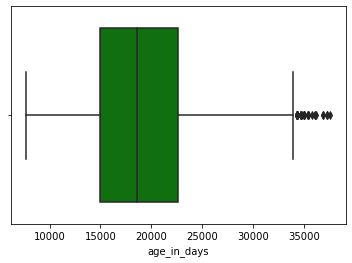

In [11]:
# Similarly another example of a boxplot representing the 'age_in_days' column:
sn.boxplot(train['age_in_days'],color='green')
plt.show()

This plot shows the following:

1. The minimum age of customers on the dataset is less than 10,000 days. ie; the youngest customer is of age less than 10,000 days.
2. 1st Quartile of the age data is 15,000 days.
3. Median age is less than 20,000 days.
4. 3rd Quartile of the age data is near about 22,500 days.
5. The maximum age of customers is more than 35,000 days. ie; the oldest customer is of age more than 35,000 days.

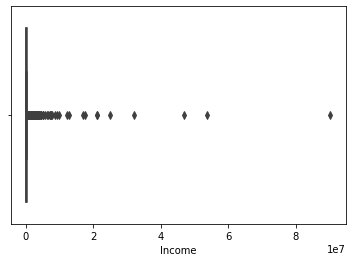

In [12]:
# One more example of boxplot reading is as follows:
sn.boxplot(train['Income'])
plt.show()

This boxplot shows that majority of customers get income under Rs 1x10^7 (1 crore) per month. Two points between 4 & 6 on the plot show incomes below 5 crores & above 5 crores per month. The maximum income on the dataset is more than Rs 8 crores per month.

Visualizing the distribution of various variables may give better understanding of the data on the dataset. The distribution of continuous variables is visualized by using **Histograms**. I'll plot some histograms now:

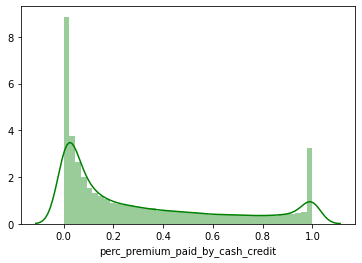

In [13]:
# Plotting the distribution of the 2nd column of train dataset using Histogram:
sn.distplot(train['perc_premium_paid_by_cash_credit'],color='green')
plt.show()

This is almost a right-skewed distribution. But it also looks like a little bimodal distribution as there's a small peak at the extreme right as well. But what this really shows is that the percentage of premium amount paid by cash or credit card by maximum customers is around 0. While the percentage of premium amount paid by cash or credit card by a few amount of customers is around 1. This means the mode of the distribution is 0. Let me check it using 'mode' function also:

In [14]:
train['perc_premium_paid_by_cash_credit'].mode()

0    0.0
dtype: float64

The reason why the plot for 'perc_premium_paid_by_cash_credit' column has so many values in between 0 & 1 is that this column has 'float' values. Next I'll check the distribution of 'Income' column which has all 'int' values:

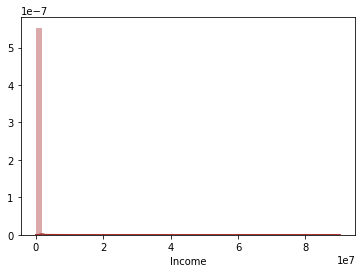

In [15]:
# Checking the 'income' distribution:
sn.distplot(train['Income'],color='brown')
plt.show()

This is extremely right skewed distribution. So to make some sense out of this data I'll have to use variable transformation. For this I'll take logarithm of the Income data & then plot its distribution. Now is the time to import '**numpy**' library:

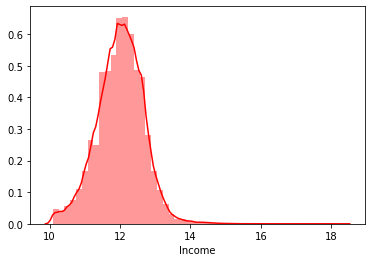

In [16]:
# Importing numpy library:
import numpy as np
# Now taking logarithm of the Income data and then plotting its distribution:
sn.distplot(np.log(train["Income"]),color='red')
plt.show()

In [17]:
# This seems a better distribution. I can read it now & tell various statistics about it. The min & max are 10 & 14 respectively
# Also it looks like the mode is 12. Let's confirm it using mode function:
np.log(train['Income']).mode()

0    11.919257
dtype: float64

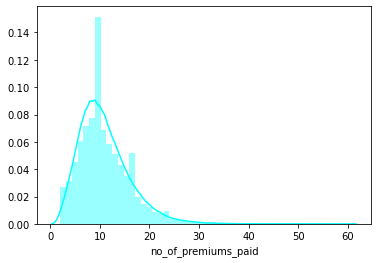

In [18]:
# Now I'll check distribution for another 'int' variable named 'no_of_premiums_paid':
sn.distplot(train['no_of_premiums_paid'],color='cyan')
plt.show()

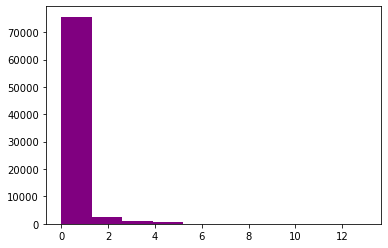

In [19]:
# Now I'll check the 'Count_3-6_months_late' column distribution:
plt.hist(train['Count_3-6_months_late'],histtype='stepfilled',label=str,color='purple',bins=10)
plt.show()

Notice from the distribution plot that although the 'Count_3-6_months_late' variable is considered float by python but it is actually an int variable as it has discrete values & not continuous! It reminds me of categorical variable. So now is the time I introduce the categorical variables & their analysis:

The categorical variables are discrete in nature & are stored as 'object' datatype. During the Univariate analysis of categorical variables, the task is to look for 'count' and 'count%'.



Count gives the absolute frequency of each category in a categorical variable. While Count% shows the proportion of different categories in a categorical variable, expressed as %.

To analyse categorical variables the plotting methods used are frequency table & barplots. I'll make a **frequency table** now:

In [20]:
train['Count_3-6_months_late'].value_counts()

0.0     66801
1.0      8826
2.0      2519
3.0       954
4.0       374
5.0       168
6.0        68
7.0        23
8.0        15
9.0         4
11.0        1
12.0        1
13.0        1
10.0        1
Name: Count_3-6_months_late, dtype: int64

This shows the various 'categories' in 'Count_3-6_months_late' column. For instance, the 1st category tells that there are 66801 customers on the train dataset who don't have any number of premiums late by 3-6 months. But many of them are on either 'Count_6-12_months_late column' or on 'Count_more_than_12_months_late' column. This means they have some premiums due in 6-12month and/or more than 12 months categories. To be more clear with the frequency table, notice that there are 8826 customers who have 1 premium late by 3-6 months. For another example, 4 customers have 9 premiums late by 3-6 months. Finally there's 1 customer who has as much as 10 premiums late by 3-6 months! That's a lot!

Similar counts can be seen for 6-12 months and more than 12 months categories as follows:

In [21]:
train['Count_6-12_months_late'].value_counts()

0.0     75831
1.0      2680
2.0       693
3.0       317
4.0       130
5.0        46
6.0        26
7.0        11
8.0         5
10.0        4
9.0         4
14.0        2
11.0        2
13.0        2
17.0        1
12.0        1
15.0        1
Name: Count_6-12_months_late, dtype: int64

In [22]:
train['Count_more_than_12_months_late'].value_counts()

0.0     76038
1.0      2996
2.0       498
3.0       151
4.0        48
5.0        13
6.0         6
7.0         3
8.0         2
11.0        1
Name: Count_more_than_12_months_late, dtype: int64

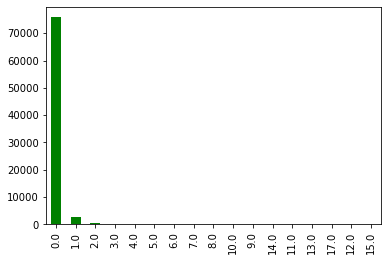

In [23]:
# I'll plot the barplot for Count_6-12_months_late variable to visualize the above frequency plot:
train['Count_6-12_months_late'].value_counts().plot.bar(color='green')
plt.show()

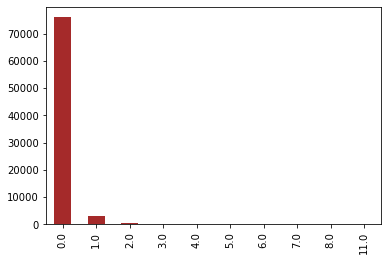

In [24]:
# Similarly for 'Count_more_than_12_months_late' column:
train['Count_more_than_12_months_late'].value_counts().plot.bar(color='brown')
plt.show()

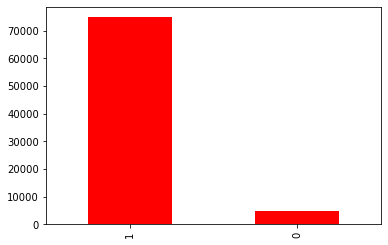

In [25]:
# I'll now visualize the 'target' data to check how many customers paid the premium on time:
train['target'].value_counts().plot.bar(color='red')
plt.show()

In [26]:
# But this plot doesn't quite explain the actual figures. So I'll check it using the value_counts function:
train['target'].value_counts()

1    74855
0     4998
Name: target, dtype: int64

Okay so 74855 customers paid their premium on time. Only 4998 customers didn't pay their premium on time. Till now I've been examining a single variable at a time. Now I'll examine two variables at a time:

------------------------------------------------------------------------------------------------------------
## Bivariate Analysis:

![Bivariate Analysis](http://image.slideserve.com/182834/bivariate-distribution-n.jpg)

Here I'll study two variables together to check if they are associated with each other. It may help me detect anomalies in the dataset (if present).

There are 3 types of Bivariate Analysis. They are:

1. Continuous-Continuous Analysis
2. Categorical-Continuous Analysis
3. Categorical-Categorical Analysis.

I'll start with the first one, ie; **Continuous-Continuous Analysis**: Here I'll examine two continuous variables together. I'll start with 'age_in_days' & 'Income' columns:

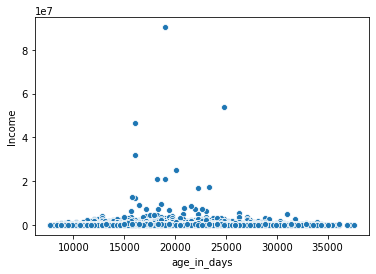

In [27]:
# For this analysis I'll use scatter plot:
sn.scatterplot(train['age_in_days'],train['Income'])
plt.show()

This plot is telling the following facts:

1. The maximum age of customers in the train dataset is around 38000 days & minimum age is around 4000 days.
2. Majority of the customers earn income less than Rupees 1x10^7 (1 crore) monthly.
3. Few anomalies are present in the income as some customers do earn a lot ranging from Rs 1 crore to Rs 9 crore monthly!
4. The age range of these highly earning individuals lie between 15000 days to 25000 days.

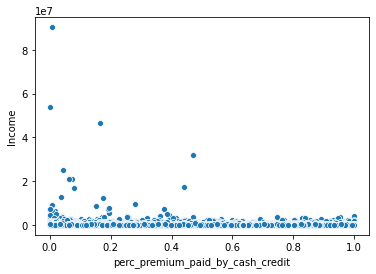

In [28]:
# Now I'll see the relation between income of customers and the number of premium they pay by cash or credit card:
sn.scatterplot(train['perc_premium_paid_by_cash_credit'],train['Income'])
plt.show()

This plot shows the following:

1. The customers who earn less than Rs 1 crore monthly as salary pay 0 to 100 % of their premium by either cash or credit card.
2. The high income customers pay in range 0% to 50% of their premium by either cash or credit card.
3. The customer who earns around 9 crore a month pays 0% premium either by cash or credit card.
4. The customer who earns around 5 crore a month pays 20% premium by cash or credit card.
5. The customer who earns over 3 crore a month pays 50% premium by cash or credit card.
6. It seems the high income group must be using some other means to pay majority of their premium.

**Categorical-Continuous Analysis**:

Now I'll check the relation between different categorical variables with continuous variables using Barplots:

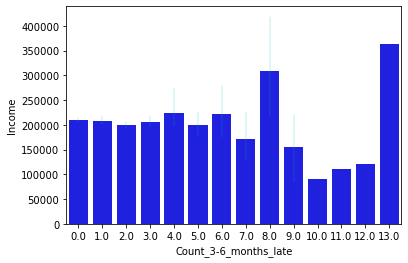

In [29]:
# I'll start with income of customers & how many premiums they are late by 3-6 months:
sn.barplot(train['Count_3-6_months_late'],train['Income'],color='b',errcolor='c',errwidth='.26')
plt.show()

The black vertical lines on the tip of some bars represent uncertainty in the data. Anyway, this plot shows the following:

1. All the customers who are late to pay their premiums by 3-6 months earn below Rs 4,00,000 (4 Lakhs) a month.
2. Some customers who earn around Rs 3,50,000 a month but still they are as much as 13 premiums late by 3-6 months.
3. Some customers who earn Rs 3 Lakh a month are 8 premiums late by 3-6 months.
4. Some customers who earn Rs 2 Lakh a month are 0 premiums late.
5. Some customers who earn little less than Rs 1 Lakh per month are upto 10 premiums late.

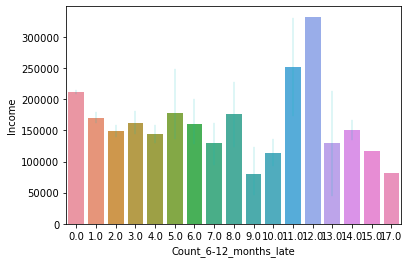

In [30]:
# I'll check the similar relation between Income & 6-12 month late category:
sn.barplot(train['Count_6-12_months_late'],train['Income'],errcolor='c',errwidth='.26')
plt.show()

This plot shows that only those customers who earn Rs 4 lakh & less are in the 6-12 months late category. There are some customers who earn around Rs 75,000 are as much as 17 premiums late by 6-12 months. This category shows even more late-payers than previous category. Let me see the next category to find if there are even more in it than these two categories:

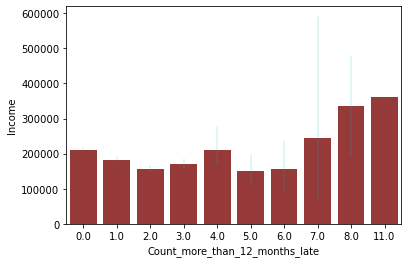

In [31]:
# Checking the relation between Income of customers & how many premiums they are late by 12 months or more:
sn.barplot(train['Count_more_than_12_months_late'],train['Income'],color='brown',errcolor='c',errwidth='.26')
plt.show()

So this gives a sigh of relief that there are customers in this category who are atleast not more than 11 premium late unlike the previous category. Some customers who earn around Rs 3,50,000 are 11 premiums late by more than 12 months. And the similar story is told here.

One thing is clear from above 3 plots though that the customers who earn more than Rs 4 lakh a month have been paying their premiums on time. So the insurance company should not be worried atleast about all the rich customers as they seem to be sticking around with the company in near future. Great news! :D

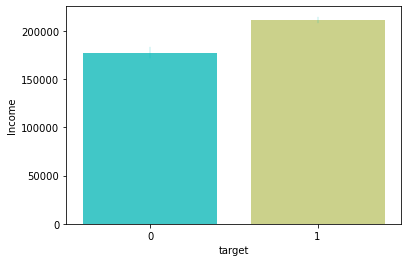

In [32]:
# To make sure about the rich customer category I'll make a final barplot to see the relation between income & 'target' column:
sn.barplot(train['target'],train['Income'],palette='rainbow',errcolor='c',errwidth='.26')
plt.show()

This shows that the customers who earn under Rs 1,80,000 a month are the ones the insurance company should be worried about. As they are the ones who did not pay their premiums on time.

**Categorical-Categorical Analysis**:

Now I'll check relationship between various categorical variables with other categorical variables using matrix type Two-Way Tables:

In [33]:
# I'm starting with 'target' & 'residence' columns:
pd.crosstab(train['target'],train['residence_area_type'])

residence_area_type,Rural,Urban
target,,
0,1998,3000
1,29672,45183


This **two-way table** is displaying the following:

1. The number of customers from both rural & urban residence area type who didn't pay their premium on time & also those who payed their premium on time.
2. The number 0 on the target column represents those customers who didn't pay their premium on time.
3. The number 1 on the target column represents the customers who paid their premium on time.
4. The Rural column is showing that there are 1,998 rural customers of the insurance company who didn't pay their premiums on time. Whereas 29,672 rural customers paid their premiums on time.
5. The urban column is showing that there are 3,000 urban customers who didn't pay their premiums on time. On the other hand, there are 45,183 urban customers of the insurance company who paid their premium on time.

Now I'll check the relation between the 'Sourcing channel' & residence area type to see if residents of the two area types prefer different types of sourcing channel:

In [34]:
pd.crosstab(train['residence_area_type'],train['sourcing_channel'])

sourcing_channel,A,B,C,D,E
residence_area_type,,,,,
Rural,17115,6506,4780,2999,270
Urban,26019,10006,7259,4560,339


This shows the following:

1. 17,115 rural customers prefer the sourcing channel A, whereas 26,019 urban customers prefer channel A.
2. 6,506 rural customers prefer the sourcing channel B, whereas 10,006 urban customers prefer channel B.
3. 4,780 rural customers prefer the sourcing channel C, whereas 7,259 urban customers prefer channel C.
4. 2,999 rural customers prefer the sourcing channel D, whereas 4,560 urban customers prefer channel D.
5. 270 rural customers prefer the sourcing channel E, whereas 339 urban customers prefer channel E.

In [35]:
# Now I'll see in what proportion they prefer a specific sourcing channel:
train['sourcing_channel'].value_counts()/len(train['sourcing_channel'])

A    0.540168
B    0.206780
C    0.150765
D    0.094661
E    0.007627
Name: sourcing_channel, dtype: float64

So 54% of total customers prefer channel A, 20.67% customers prefer channel B, 15% customers prefer channel C, and so on. Clearly A is the most preferred channel whereas E is the least preferred channel among the customers.

In [36]:
# Now I want to see how many customers of this company live in urban area type & how many of them live in rural area:
train['residence_area_type'].value_counts()

Urban    48183
Rural    31670
Name: residence_area_type, dtype: int64

So the company has 48,183 urban customers & 31,670 rural customers. Now I'll have to see what percentage of total customers are urban/rural:

In [37]:
train['residence_area_type'].value_counts() / len(train['residence_area_type'])

Urban    0.603396
Rural    0.396604
Name: residence_area_type, dtype: float64

So 60.33% of all customers are urban & 39.66% of them are rural. I'll now finally check if the proportion of rural to urban is same across all the channels:

In [38]:
17115/(17115+26019) , 6506/(6506+10006) , 4780/(4780+7259) , 2999/(2999+4560) , 270/(270+339)

(0.3967867575462512,
 0.39401647286821706,
 0.3970429437660935,
 0.39674560127000924,
 0.4433497536945813)

It can be seen from above result that other than channel E, all other channels are preferred in equal proportion by the customers. But the channel E is comparatively more preferred by the rural customers.

Now I'll check the relationship between 'number of premiums paid' & 'target' columns:

In [39]:
pd.crosstab(train['no_of_premiums_paid'],train['target'])

target,0,1
no_of_premiums_paid,,
2,215,511
3,235,1511
4,271,2636
5,325,3890
6,319,5316
7,379,6244
8,371,6813
9,351,6807
10,326,6547


This Two-Way table shows the following:

* The urban customers paid a lot more premiums than the rural customers.
* There's an increasing trend of number of premiums paid by urban customers from 2 premiums to 8 premiums.
* Maximum number of urban customers paid 8 premiums.
* Maximum number of rural customers paid 7 premiums.
* Then there's a decreasing trend from 8 premiums to 60.
* 511 urban customers & 215 rural customers paid 2 premiums.
* 1,511 urban customers & 235 rural customers paid 3 premiums.
* 3,890 urban customers & 325 rural customers paid 5 premiums.
* 6,547 urban customers & 326 rural customers paid 10 premiums.
* 3,085 urban customers & 179 rural customers paid 15 premiums.
* 1,055 urban customers & 79 rural customers paid 20 premiums.
* 282 urban customers & 23 rural customers paid 25 premiums.
* 85 urban customers & 6 rural customers paid 30 premiums.
* 1 urban customer paid 50 premiums but 2 rural customers paid 50 premiums! This is good.
* 1 urban customer paid 60 premiums on the other hand 1 rural customer paid 59 premiums!

In [40]:
# Now I'm moving on to check relationship between 'residence area type' & 'count 3-6 months late' columns:
pd.crosstab(train['residence_area_type'],train['Count_3-6_months_late'])

Count_3-6_months_late,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
residence_area_type,,,,,,,,,,,,,,
Rural,26567,3425,996,402,140,62,27,7,9,3,1,0,1,0
Urban,40234,5401,1523,552,234,106,41,16,6,1,0,1,0,1


This shows the following:

* 40,234 urban customers & 26,567 rural customers have 0 premiums due by 3-6 months.
* 5,401 urban customers & 3,425 rural customers have 1 premium due to pay by 3-6 months.
* 106 urban customers & 62 rural customers are 5 premiums late by 3-6 months.
* 1 urban customer & no rural customer is 13 premiums late by 3-6 months.

In [41]:
# Similarly I'm checking relationship between 'residence area type' & 'count 6-12 months late' columns:
pd.crosstab(train['residence_area_type'],train['Count_6-12_months_late'])

Count_6-12_months_late,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,17.0
residence_area_type,,,,,,,,,,,,,,,,,
Rural,30039,1110,271,130,55,14,11,4,2,1,1,0,1,0,1,0,0
Urban,45792,1570,422,187,75,32,15,7,3,3,3,2,0,2,1,1,1


Here 3 urban & 1 rural customers are late by 10 premiums, 2 urban customers are late by 13 premiums, 1 urban & 1 rural customers are late by 14, 1 urban customer is late by as much as 17 premiums by 6-12 months, etc.

In [42]:
# Finally the relation between residence area type & 'count more than 12 months' columns:
pd.crosstab(train['residence_area_type'],train['Count_more_than_12_months_late'])

Count_more_than_12_months_late,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,11.0
residence_area_type,,,,,,,,,,
Rural,30135,1209,217,58,14,4,2,0,1,0
Urban,45903,1787,281,93,34,9,4,3,1,1


This table shows that the in 'more than 12 month' category, the maximum number of premiums late by an urban customer is 11. While the maximum number of premiums late by a rural customer is 8.

I'll now represent a Correlation plot to display the relationship between all the numerical variables together at ones. A characteristic of Correlation plot is that it only includes numerical variables.

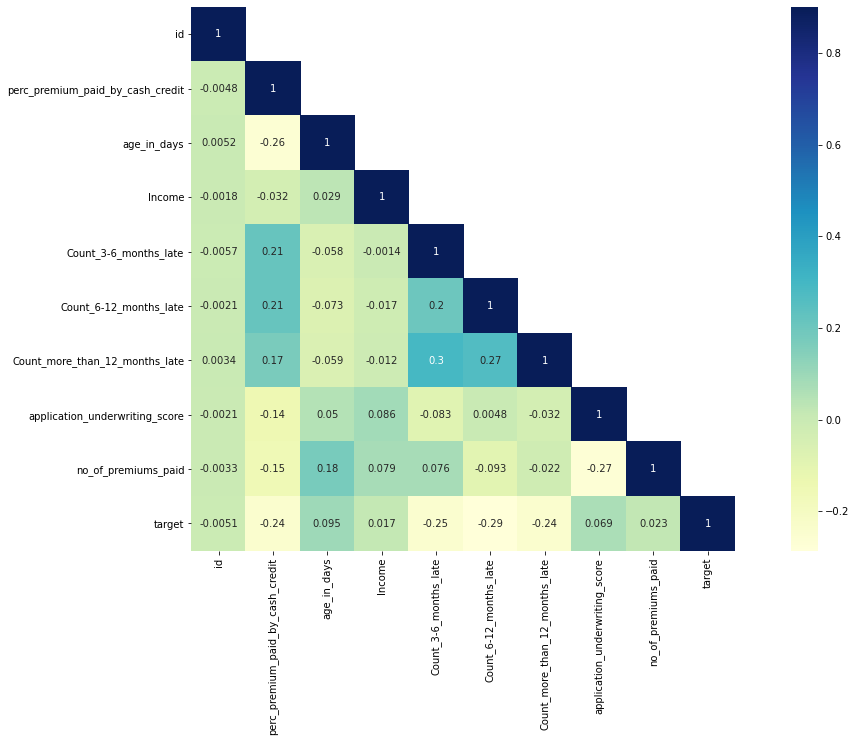

In [43]:
corr= train.corr()
mask=np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask, vmax=0.9, square=True, annot=True, cmap='YlGnBu')
plt.show()

This correlation plot is representing the strength as well as direction of correlation between all the variables. For example:

* The 'target' and 'id' variables/columns have a correlation coefficient of -0.0051. This means that these two variables are negatively correlated with each other by a strength of 0.0051. This strength is very weak.
* The 'target' & 'perc_premium_paid_by_cash_credit' variables have a correlation coefficient of -0.24. This means they are also negatively correlated but by a strength of 0.24. Although this strength too is weak but it is comparatively stronger than the previous pair.
*  Negative correlation coefficient means when the value of one variable increases the value of the other one decreases. While positive correlation coefficient means when value of one variable increases the value of other variable also increases.
* 'target' and 'age_in_days' are positively correlated by a weak strength of 0.095.
* It is clear that the strongest strength between target & any other variable is of 0.29 units only. This is a negative correlation between 'target' & 'Count_more_than_12_months_late' columns. This means the more the value of 'count' a customer has, the less he's going to a '1' in his target column. Though the strength of the counts is not that high to give any noticeable difference.

I'll need to further investigate this dataset to check if it has any missing values.

----------------------------------------------------------------------------------------------------------------
## Missing Value Investigation:

![Missing Values](https://datascienceplus.com/wp-content/uploads/2015/08/missing-values-r.png)

There may be missing or empty values in the dataset due to either error in data collection or due to some error in reading data. Also, since 'income' is involved in this dataset so there may be some customers who may not be willing to reveal their true income. Whatever the reason, I'll have to investigate for the missing values because I have to train my model from the 'train' dataset to predict the 'target' values in the 'test' dataset. So if I leave the missing values in the 'train' dataset and train my model the predictions of test dataset may get highly affected. Resulting in totally wrong prediction results.

In [44]:
# Firstly, checking the missing values in the whole train dataset using 'isnull' function:
train.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

This is telling the following:

1. There are 97 missing values in Count_3-6_months_late column
2. There are 97 missing values in Count_6-12_months_late column
3. There are 97 missing values in Count_more_than_12_months_late column
4. There are 2,974 missing values in application_underwriting_score column
5. No other column in the dataset has any missing value.

Now I have to treat these missing values otherwise they'll affect my final predictions. I'll treat the missing values of all the three "count" columns by filling up zero in place of the missing values. This is due to the fact that I don't know whether a customer is 0 premium late or 1 or 2 or more premiums late. The customer can be practically any number of premiums late which is impossible to find out. So it'd be better if I assume he/she is 0 premium late. Because if I put 1 in front of someone who has really paid all of his/her premiums on time & I treat my model with these wrong values, then it'll result in bad predictions in the test dataset.

In [45]:
# So, filling 0 as missing values using 'fillna' function in all 3 'Count' columns:
train['Count_3-6_months_late'].fillna(0,inplace=True)
train['Count_6-12_months_late'].fillna(0,inplace=True)
train['Count_more_than_12_months_late'].fillna(0,inplace=True)

Now for the missing values in 'application_underwriting_score' column, I'll fill them with the mean of this column. There's a condition that applications under the score of 90 do not get insured. So obviously if I fill the missing values of this column with 0 & train my model then similar kind of data in test dataset will get affected. There are various methods to fill up a missing value, apart from using 0. Few of them are mean, median, mode, minimum value, maximum value, etc. The mean is the average of all the values of a particular column. The median is the middle value of all the values of the column. The mode is the most common value in the entire column. So filling the underwriting score with mean seems to be the best option.

In [46]:
# Filling up missing values in 'application_underwriting_score column' with the mean of this column:
train['application_underwriting_score'].fillna(train['application_underwriting_score'].mean(),inplace=True)

In [47]:
# Verifying if all missing values got filled up or not:
train.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
target                              0
dtype: int64

In [48]:
# Checking if 'test' dataset has any missing values:
test.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
dtype: int64

In [49]:
# Yes it does! And it has missing values on same columns as train dataset.
# So I'll do the same filling on the test dataset as done on train dataset:
test['Count_3-6_months_late'].fillna(0,inplace=True)
test['Count_6-12_months_late'].fillna(0,inplace=True)
test['Count_more_than_12_months_late'].fillna(0,inplace=True)
test['application_underwriting_score'].fillna(test['application_underwriting_score'].mean(),inplace=True)

In [50]:
# Verifying missing values in test dataset:
test.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
dtype: int64

Now is the time to adjust the dataset according to the scikit learn implementation. So here starts the next part called training the model:

---------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------
# 2. Training the Model

![Training model](https://www.recordedfuture.com/wp-content/uploads/machine-learning-cybersecurity-applications.png)

The **scikit learn algorithms** take two separate arguments. This means they need independent variables separately & the dependent variable (or target variable) separately. But since in the train dataset both independent & dependent variables are present together so I need to separate them out.

Firstly, I'll create a set of independent variables from the train dataset. So I'm dropping the 'target' variable from it using axis=1. This axis=1 specifies that the drop shall happen from the column. I'll store this set in an object called "x" as follows:

In [51]:
x = train.drop('target',axis=1)

Now I need my separate target variable. So keeping only the '**target**' variable in an object y:

In [52]:
y = train['target']

As a 'train.csv' file, I have just a single dataframe. But for the purpose of modeling I need separate train & test sets from this main train.csv file. So I'll split this original train dataset into further train & test datasets.

So for the purpose of splitting I'll use a **module called "Model Selection"**. In that module I'll use the "train_test_split" function as follows:

In [53]:
from sklearn.model_selection import train_test_split

This split function accepts an independent variable 'x' & a dependent variable 'y', and then split them into two parts. First is independent variable for train and independent variable for test. And then dependent variable for train and dependent variable for test. I'm naming them as **train_x, test_x, train_y & test_y** sets respectively as follows:

In [54]:
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=11111, shuffle=True, train_size=None, test_size=None)

In the brackets there are various **parameters**. During the scoring stage, these parameters can be adjusted to get the **best model score or accuracy**.

One thing about sklearn is that it needs input in terms of numbers only. ie; either as int datatype or as float datatype. This means **sklearn doesn't take string as input**. So to get rid of strings I need to create numeric features out of these categorical or string features. So I'll now use a concept called "**Dummification**" where I'll create dummies of variable.

In [55]:
# Creating dummies of both train_x and test_x sets:
train_x = pd.get_dummies(train_x)
test_x = pd.get_dummies(test_x)

Now I'll check the proportion of 1s and 0s in the dependent variables of train & test that I just created:

In [56]:
train_y.value_counts()/len(train_y)

1    0.936316
0    0.063684
Name: target, dtype: float64

This means there are 93.6% 1s & 6.3% 0s in train_y set. I'll now check the same for test_y set:

In [57]:
test_y.value_counts()/len(test_y)

1    0.940693
0    0.059307
Name: target, dtype: float64

This means there are 94% 1s & 5.9% 0s in test_y set. So I've got almost similar proportions of 1s & 0s in both dependent sets. This is good because now whatever performance I'll get on the train will get emulated on the test.

## Logistic Regression Model:

![Logistic Regression](https://1.bp.blogspot.com/_Tndn7IbKcao/Syu0vkRlGtI/AAAAAAAAAIk/TQ-K2fOr9w0/s400/SigmoidPlot1.png)

Now I'll train my model on train_x & train_y and predict on test_x. For this purpose I'll import the **LogisticRegression** which is inside a module named **linear_model** in scikit learn:

In [58]:
from sklearn.linear_model import LogisticRegression

Now I'll create an object for this so that I can use the "**fit**" & the "**predict**" functions on it. I'm naming this object as logr:

In [59]:
logr = LogisticRegression(n_jobs=1,max_iter=100,random_state=11111)

The parameters inside the brackets can be adjusted(increased or decreased) to improve model score or **accuracy** during the scoring stage.

Now I'll run the fit function on train_x & train_y using my LogisticRegression model as follows:

In [60]:
logr.fit(train_x,train_y)

LogisticRegression(n_jobs=1, random_state=11111)

Scikit learn provides a function called "**score**" which can be used **to check the performance of my model**. This shows the accuracy for how well my model fits. It takes 2 arguments one independent variable & one dependent variable. I'll use this function 1st on train_x & train_y and then on test_x & test_y as follows:

In [61]:
logr.score(train_x,train_y)

0.936315517039857

In [62]:
logr.score(test_x,test_y)

0.9406932478461231

This means there's 93.6 % accuracy on my train dataset & 94 % accuracy on the test dataset. This also means that the test sample is really a representative of the train sample. However, a training score of 93.6 % is not that great for a good prediction of an unseen test dataset. The test set that I've been using till now was made out of the train dataset. But the test dataset that I've got as "test.csv" file has data of totally new customers. So it's like an unseen data for my model. For this reason, my LogisticRegression model will not give true predictions for the test.csv dataset.

So I'll try another model called **DecisionTreeClassifier** and see if I can achieve better training score from that:

## Decision Tree Classifier Model:

![Decision Tree](https://www.xoriant.com/blog/wp-content/uploads/2017/08/a-decisionTreesforClassification-AMachineLearningAlgorithm.jpg)

Again I'll train my model on train_x & train_y and predict on test_x. This time I'm importing the Decision Tree Classifier which is inside the **module called Tree** in scikit learn:

In [63]:
from sklearn.tree import DecisionTreeClassifier

Now I'll create an object for this also so that I can use the "fit" & the "predict" functions on it as well. I'm naming the object as dtc.

In [64]:
dtc= DecisionTreeClassifier(max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0)

Now I'll run the fit function on train_x & train_y using my DecisionTreeClassifier model as follows:

In [65]:
dtc.fit(train_x,train_y)

DecisionTreeClassifier()

This time I'll use the score function with dtc. So using it 1st on train_x & train_y and then on test_x & test_y as follows:

In [66]:
dtc.score(train_x,train_y)

1.0

In [67]:
dtc.score(test_x,test_y)

0.9032758966139051

So there's 100 % accuracy on my train dataset & 90.3 % accuracy on the test dataset. This means my model is 100% accurate on the train dataset now. But still, a test accuracy of 90.3% is not that great. So I'll take up one more model which is called **Random Forest**:

## Random Forest Model:

![Random Forest](https://cdn-images-1.medium.com/max/1024/0*DrAmS5L2ekBlAXJy.png)

As before, I'll be training my model on train_x & train_y and predicting on test_x. This time I'm importing the Random Forest Classifier which is inside the **module called Ensemble** in scikit learn:

In [68]:
from sklearn.ensemble import RandomForestClassifier

Creating an object for the Random Forest Classifier so that I can use the "fit" & the "predict" functions on it. I'm naming the object as rfc:

In [69]:
rfc = RandomForestClassifier(n_estimators = 100)

Running the fit function on train_x & train_y using my **RandomForestClassifier** model as follows:

In [70]:
rfc.fit(train_x,train_y)

RandomForestClassifier()

Now using the score function with rfc. Using it 1st on train_x & train_y and then on test_x & test_y as follows:

In [71]:
rfc.score(train_x,train_y)

0.9999833024428526

In [72]:
rfc.score(test_x,test_y)

0.9413945101182127

Now that's a pretty **good accuracy** on both sets. These scores look close enough to obtain **predictions** now:

----------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------
# 3. Predicting the target values

![target Predictions](https://fintech4us.files.wordpress.com/2017/12/making-predictions-clipart-1.jpg?w=720&h=540)

As my Random Forest model has achieved significant score, I can use this model to get the predictions. I'll start with **getting predictions on train_x** set as follows:

In [73]:
rfc.predict(train_x)

array([1, 1, 1, ..., 1, 1, 0])

In [74]:
# Similarly getting predictions on test_x as follows:
rfc.predict(test_x)

array([1, 1, 1, ..., 1, 1, 1])

Now I'll pick up the main test.csv dataset. I've already filled the missing values on this dataset. I'll first **compare the size**s of this and train_x set to see how different is test dataset currently from the train_x:

In [75]:
test.shape , train_x.shape

((34224, 11), (59889, 16))

Okay so this shows that I have less number of columns in the test dataset as compared to train_x set. This is due to the use of that 'dummies' function on train_x set. So I'll have to use this dummies function on test dataset also:

In [76]:
test = pd.get_dummies(test)

Now I'll again check the size of test dataset to verify if now I **have equal number of columns** on both train_x & test datasets:

In [77]:
test.shape

(34224, 16)

Great! So now I can use my rfc model to get predictions on this test dataset:

In [78]:
rfc.predict(test)

array([1, 1, 1, ..., 1, 1, 1])

I'm storing these predictions in an object called '**test_prediction**':

In [79]:
test_prediction = rfc.predict(test)

Now I'll create a **new csv file**. Firstly I'll create a 'target' column in a csv file, then I'll **submit** the test predictions that I've got above in that column. And finally I'll save this csv file with a name. This process is as follows:

In [80]:
submission = pd.DataFrame()

In [81]:
submission['target'] = test_prediction

In [82]:
submission.to_csv('customer_premium_on_time.csv', header=True, index=False)

![Success](https://www.highschoolillustrated.com/wp-content/uploads/2013/01/success_sign.png)

The task has been completed successfully. It's my first detailed work so **please upvote** if you liked it or if it helped you in any way :)

**Thank you** very much for looking into my notebook. **Best regards**,
* Rachit Shukla :)